# Retail Lab (Data Transformation Stage)

**Learning Objectives:**
  * Practice basic statistical analysis techniques
  * Gain exposure to retail related DataSets

## Context of the datasets

### 1. There are three datasets: `articles.csv.zip`, `customers.csv.zip` and `transactions2020.csv.zip`

#### 2. The Articles dataset contains information over products available.
#### 3. The Customers dataset contains information over registered customers.
#### 4. The Transactions dataset contains purchases of articles made by customers.



## 1. Library Import

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [3]:
Articles=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/articles.csv.zip")

In [4]:
Articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [5]:
Articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [6]:
Customers=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/customers.csv.zip")

In [7]:
Customers.sample(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
453367,54b93cbafe3d739e2a96ffad0bf37a43e33f9f6299eaeb...,1.0,1.0,ACTIVE,Regularly,27.0,90d068afcd7352be5ba8bc7147e1a30a1584277d7768b9...
127190,17b6ffcf4f38309a32c0145e0db6eb6646fddda7f913f4...,NaN,NaN,ACTIVE,NONE,20.0,d05397cb23747ec2e3e2fa5b0c758302f63e20490488dc...
663699,7be21d4070cba21e67c389eb6c7e36316e860484a903f9...,NaN,NaN,ACTIVE,NONE,60.0,e411c0091b65734beebf00933a1a5bb358a8ecdbe62cda...


In [8]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [9]:
Transactions=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/transactions2020.csv.zip")

In [10]:
Transactions.sample(3)

,t_dat,customer_id,article_id,price,sales_channel_id
4045460,2020-08-24,72afe6a64cf9e142b243de27e25484258e07debba2343c...,853839001,0.022017,2
2952016,2020-07-28,74f548f87bb0d2fc581bd82c6c23e3bde08785843c958c...,822203005,0.022017,2
4784443,2020-09-12,366276af127185c2c0edc7f59745ed0b683b32d7b3cdf5...,921298001,0.025407,1


In [11]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151470 entries, 0 to 5151469
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 196.5+ MB


## 3. Merging DataFrames

#### 3.1. Transactions-Articles


In [12]:
Transactions.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2


In [13]:
Articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [14]:
## we merge both DataFrames using the common key: article_id. We store the result in a new DataFrame
TransactionsAndArticles=pd.merge(Transactions, Articles, how='left',on='article_id')

#### 3.2. Transactions-Articles-Customers

In [15]:
TransactionsAndArticles.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,Nightwear,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Trousers & Skirt,A,Ladieswear,1,Ladieswear,18,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned..."
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined..."


In [16]:
Customers.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [17]:
## we merge both DataFrames using the common key: customer_id. We store the result in a new DataFrame
TransactionsAndArticlesAndCustomers=pd.merge(TransactionsAndArticles, Customers, how='left',on='customer_id')

In [18]:
TransactionsAndArticlesAndCustomers.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...,NaN,NaN,ACTIVE,NONE,40.0,0c0e15f8fa88a1d4aa6ca8a0b4a8289ca1affbaebdea22...
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned...",1.0,1.0,ACTIVE,Regularly,59.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined...",NaN,NaN,ACTIVE,NONE,23.0,8d4ceb946237cf52ce5c2a1a71d1221fde77627a52d661...


In [19]:
TransactionsAndArticlesAndCustomers.sample(3).T

,3938411,585128,4203089
t_dat,2020-08-21,2020-06-14,2020-08-28
customer_id,5879fe4ee9e73d9fee61252249bb9df0173fcbbcad13a1...,50e0a23256cff5eadf31c63b5e10364d3604a24d15e632...,1ee7d2b0d3b410406016ad0b7238b8e7e64be49b234dbf...
article_id,868234003,506098016,941005005
price,0.025407,0.030492,0.013542
sales_channel_id,2,2,2
product_code,868234,506098,941005
prod_name,KELLY wind jkt,Liza Push Melbourne 2pk,Nelia rib tank
product_type_no,262,306,253
product_type_name,Jacket,Bra,Vest top
product_group_name,Garment Upper body,Underwear,Garment Upper body


In [20]:
TransactionsAndArticlesAndCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151470 entries, 0 to 5151469
Data columns (total 35 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   t_dat                         object 
 1   customer_id                   object 
 2   article_id                    int64  
 3   price                         float64
 4   sales_channel_id              int64  
 5   product_code                  int64  
 6   prod_name                     object 
 7   product_type_no               int64  
 8   product_type_name             object 
 9   product_group_name            object 
 10  graphical_appearance_no       int64  
 11  graphical_appearance_name     object 
 12  colour_group_code             int64  
 13  colour_group_name             object 
 14  perceived_colour_value_id     int64  
 15  perceived_colour_value_name   object 
 16  perceived_colour_master_id    int64  
 17  perceived_colour_master_name  object 
 18  department_no         

In [21]:
del Articles, Customers, Transactions

In [22]:
TransactionsAndArticlesAndCustomers.groupby('sales_channel_id').count()

,t_dat,customer_id,article_id,price,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
sales_channel_id,,,,,,,,,,,,,,,,,,,,,
1,1788396,1788396,1788396,1788396,1788396,1788396,1788396,1788396,1788396,1788396,...,1788396,1788396,1788396,1786791,817650,804129,1787640,1780039,1779148,1788396
2,3363074,3363074,3363074,3363074,3363074,3363074,3363074,3363074,3363074,3363074,...,3363074,3363074,3363074,3361065,1502625,1482103,3356625,3358923,3352518,3363074


In [23]:
TransactionsAndArticlesAndCustomers.groupby('department_name').count()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
department_name,,,,,,,,,,,,,,,,,,,,,
AK Bottoms,4400,4400,4400,4400,4400,4400,4400,4400,4400,4400,...,4400,4400,4400,4400,2128,2099,4389,4393,4382,4400
AK Dresses & Outdoor,2879,2879,2879,2879,2879,2879,2879,2879,2879,2879,...,2879,2879,2879,2879,1402,1365,2872,2874,2865,2879
AK Other,113,113,113,113,113,113,113,113,113,113,...,113,113,113,113,66,63,113,113,113,113
AK Tops Jersey & Woven,390,390,390,390,390,390,390,390,390,390,...,390,390,390,390,155,153,390,390,390,390
AK Tops Knitwear,392,392,392,392,392,392,392,392,392,392,...,392,392,392,392,183,180,390,391,391,392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Girl Shoes,380,380,380,380,380,380,380,380,380,380,...,380,380,380,380,183,181,380,379,380,380
Young Girl Swimwear,699,699,699,699,699,699,699,699,699,699,...,699,699,699,699,337,330,699,697,698,699
Young Girl Trouser,952,952,952,952,952,952,952,952,952,952,...,952,952,952,952,483,477,951,952,943,952


In [24]:
TransactionsAndArticlesAndCustomers.groupby('section_name').count()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_no,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
section_name,,,,,,,,,,,,,,,,,,,,,
Baby Boy,6048,6048,6048,6048,6048,6048,6048,6048,6048,6048,...,6048,6048,6048,6048,2733,2697,6019,6018,6016,6048
Baby Essentials & Complements,16504,16504,16504,16504,16504,16504,16504,16504,16504,16504,...,16504,16504,16504,16504,6847,6739,16421,16413,16390,16504
Baby Girl,5482,5482,5482,5482,5482,5482,5482,5482,5482,5482,...,5482,5482,5482,5482,2743,2685,5458,5456,5445,5482
Boys Underwear & Basics,6105,6105,6105,6105,6105,6105,6105,6105,6105,6105,...,6105,6105,6105,6097,2906,2854,6079,6079,6069,6105
Collaborations,1611,1611,1611,1611,1611,1611,1611,1611,1611,1611,...,1611,1611,1611,1611,791,774,1607,1610,1602,1611
Contemporary Casual,30348,30348,30348,30348,30348,30348,30348,30348,30348,30348,...,30348,30348,30348,30348,14000,13820,30322,30283,30223,30348
Contemporary Smart,46340,46340,46340,46340,46340,46340,46340,46340,46340,46340,...,46340,46340,46340,46340,21878,21607,46290,46232,46158,46340
Contemporary Street,28180,28180,28180,28180,28180,28180,28180,28180,28180,28180,...,28180,28180,28180,28180,13643,13410,28155,28113,28079,28180
Denim Men,26376,26376,26376,26376,26376,26376,26376,26376,26376,26376,...,26376,26376,26376,26376,12262,12113,26351,26338,26264,26376


### 4. Analysis of Department's performance
#### Let's explore sales accross departments

In [26]:
TransactionsAndArticlesAndCustomers[['price','article_id','department_name']]

,price,article_id,department_name
0,0.016932,844198001,Nightwear
1,0.030492,777016001,Trousers & Skirt
2,0.010153,820507001,Expressive Lingerie
3,0.016932,869811005,Jersey
4,0.025407,823118004,Swimwear
...,...,...,...
5151465,0.059305,929511001,Dresses
5151466,0.042356,891322004,Dresses
5151467,0.043203,918325001,Bags
5151468,0.006763,833459002,Jewellery


In [32]:
TransactionsAndArticlesAndCustomersGroupbyDepartment=TransactionsAndArticlesAndCustomers.groupby('department_name').agg({'price':'sum'}).sort_values(by='price',ascending=False)
TransactionsAndArticlesAndCustomersGroupbyDepartment.head(20)

,price
department_name,
Swimwear,11010.998051
Trouser,8908.257695
Dress,8333.418153
Jersey,7675.734559
Blouse,6553.220390
Knitwear,5520.547153
Denim Trousers,4605.351424
Jersey fancy,4099.686729
Jersey Basic,3902.391407


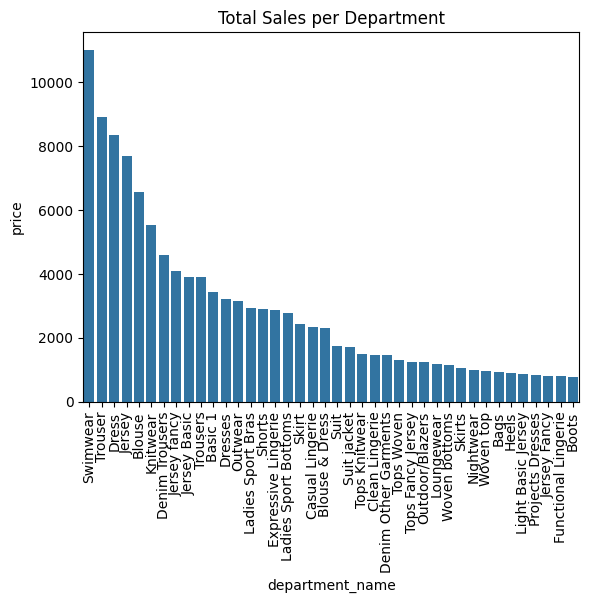

In [45]:

g=sns.barplot(data=TransactionsAndArticlesAndCustomersGroupbyDepartment.head(40),x='department_name',y='price')
g.set_title('Total Sales per Department');
g.set_xticklabels(g.get_xticklabels(), rotation=90);

### From the previous graph, Swimwear is the top sales performance

In [49]:
### due to performance reasons we consider only the top 20 departments for the following visualization
Top20Departments=TransactionsAndArticlesAndCustomersGroupbyDepartment.head(20).index

Top20DepartmentFilter=TransactionsAndArticles['department_name'].isin(Top20Departments)


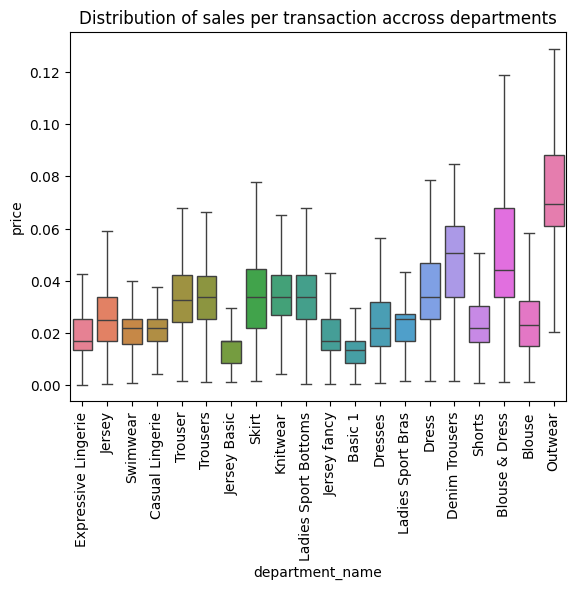

In [52]:
g=sns.boxplot(data=TransactionsAndArticles[Top20DepartmentFilter],x='department_name',y='price',showfliers=False,palette='husl')
g.set_title('Distribution of sales per transaction accross departments');
g.set_xticklabels(g.get_xticklabels(), rotation=90);

### From the previous graph, the outwear section commands the highest average sale per transaction
#### From a managerial standpoint it would be useful to develop marketing initiatives aimed at selling more products from the outwear section given its larger sale per transaction.

### 4. Analysis of Section's performance
#### Let's explore sales accross sections

In [53]:
TransactionsAndArticlesAndCustomersGroupbySection=TransactionsAndArticlesAndCustomers.groupby('section_name').agg({'price':'sum'}).sort_values(by='price',ascending=False)
TransactionsAndArticlesAndCustomersGroupbySection.head(20)

,price
section_name,
Womens Everyday Collection,26512.127441
Divided Collection,14368.467881
Womens Tailoring,12734.510153
"Womens Swimwear, beachwear",10827.219441
Womens Lingerie,8090.730153
Ladies Denim,6793.529407
Ladies H&M Sport,6275.652593
Womens Casual,5802.052390
Womens Trend,4678.023220


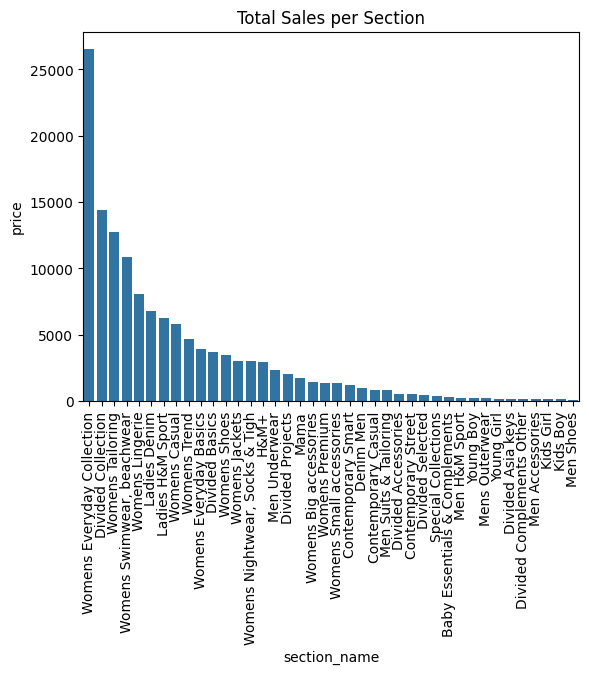

In [54]:
g=sns.barplot(data=TransactionsAndArticlesAndCustomersGroupbySection.head(40),x='section_name',y='price')
g.set_title('Total Sales per Section');
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [55]:
### due to performance reasons we consider only the top 20 departments for the following visualization
Top20Sections=TransactionsAndArticlesAndCustomersGroupbySection.head(20).index

Top20SectionFilter=TransactionsAndArticles['section_name'].isin(Top20Sections)


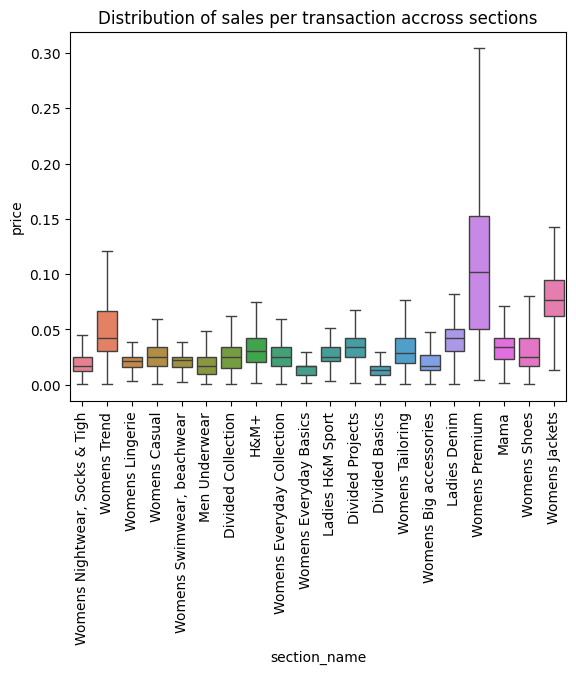

In [56]:
g=sns.boxplot(data=TransactionsAndArticles[Top20SectionFilter],x='section_name',y='price',showfliers=False,palette='husl')
g.set_title('Distribution of sales per transaction accross sections');
g.set_xticklabels(g.get_xticklabels(), rotation=90);

### 4. Analysis of Product's performance
#### Let's explore sales accross products

In [59]:
TransactionsAndArticlesAndCustomersGroupbyProduct=TransactionsAndArticlesAndCustomers.groupby('prod_name').agg({'price':'sum'}).sort_values(by='price',ascending=False)
TransactionsAndArticlesAndCustomersGroupbyProduct.head(40)

,price
prod_name,
Jade HW Skinny Denim TRS,808.759051
Pluto RW slacks (1),669.756898
Timeless Midrise Brief,500.406017
Shake it in Balconette,446.456034
SUPREME RW tights,441.984932
HAVANA HW tights,411.962966
Perrie Slim Mom Denim TRS,404.428017
Primo slacks,388.736915
Luna skinny RW,384.194034


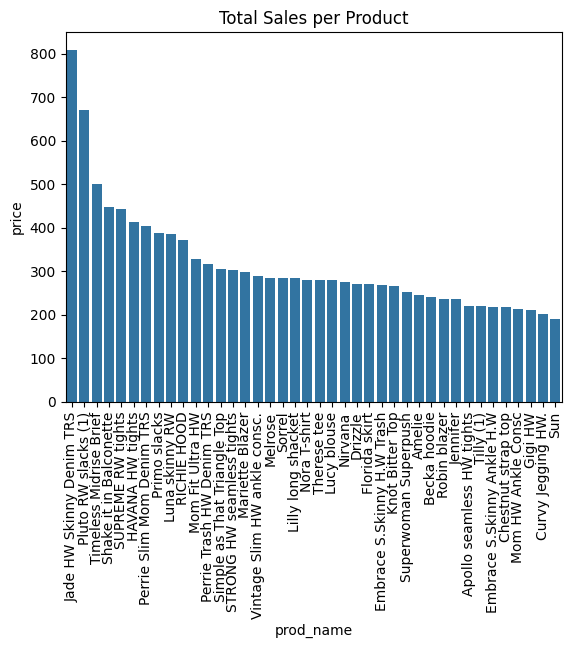

In [61]:
g=sns.barplot(data=TransactionsAndArticlesAndCustomersGroupbyProduct.head(40),x='prod_name',y='price')
g.set_title('Total Sales per Product');
g.set_xticklabels(g.get_xticklabels(), rotation=90);

#### 4.1. Where are these top 40 products being sold
##### we need to know the performance of these products accross channels

In [63]:
### due to performance reasons we consider only the top 40 products for the following visualization
Top20Products=TransactionsAndArticlesAndCustomersGroupbyProduct.head(20).index

Top20ProductsFilter=TransactionsAndArticles['prod_name'].isin(Top20Products)

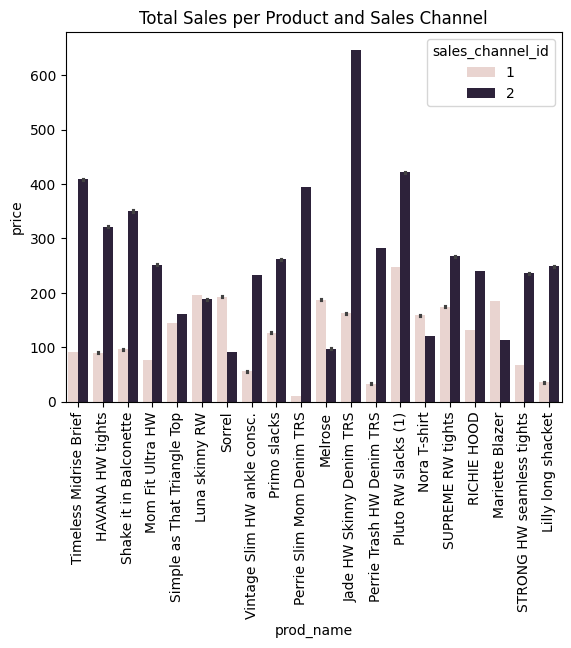

In [70]:
g=sns.barplot(data=TransactionsAndArticles[Top20ProductsFilter],x='prod_name',y='price',hue='sales_channel_id',estimator='sum')
g.set_title('Total Sales per Product and Sales Channel');
g.set_xticklabels(g.get_xticklabels(), rotation=90);

#### We observe from the previous graph that Sales Channel 2 drives sales accross all products exceptuating `Lunna Skinny`, `Sorrel`, `Melrose`, `Nora T-shirt` and `Mariette Blazer`

### 5. Who purchases from us
#### Let's explore who are our top customers.

In [75]:
TransactionsAndArticlesAndCustomersGroupbyCustomer=TransactionsAndArticlesAndCustomers.groupby('customer_id').agg({'price':'sum'}).sort_values(by='price',ascending=False)
TransactionsAndArticlesAndCustomersGroupbyCustomer.head(10)

,price
customer_id,
863f0e03da282ae32a76775ce55d8a4605a85c84a26066e1ad0e9469e8c40e68,18.907119
b637a3e7d8b0caa947aaefd609b8d84a9ee962cf0a52a51bac507ffc2bf1b741,14.198542
77db96923d20d40532eba0020b55cd91eb51358885c2d698a2805e79481f64a1,12.672356
a3ab708684132c6bbd3dad7aa41f9b9c7d1c95d7d5cb1a3a052905191e858566,11.934508
60c8dfc36653461f03d6001b77e7cf6182cf2d71f914c9295f7287126ae8da32,11.912068
d80ed4ababfa96812e22b911629e6bcbf5093769051ea447e2b696ac98a3dae9,11.086085
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc,10.647339
e97c3a6c680cd3569df10f901a61fdffaf8f70300f6adf6e266b80c87d54245a,10.501881
f374dfbc43896daed2a541c43636b55505af81c63ad2a473f293b6db5ece9e2c,10.458153


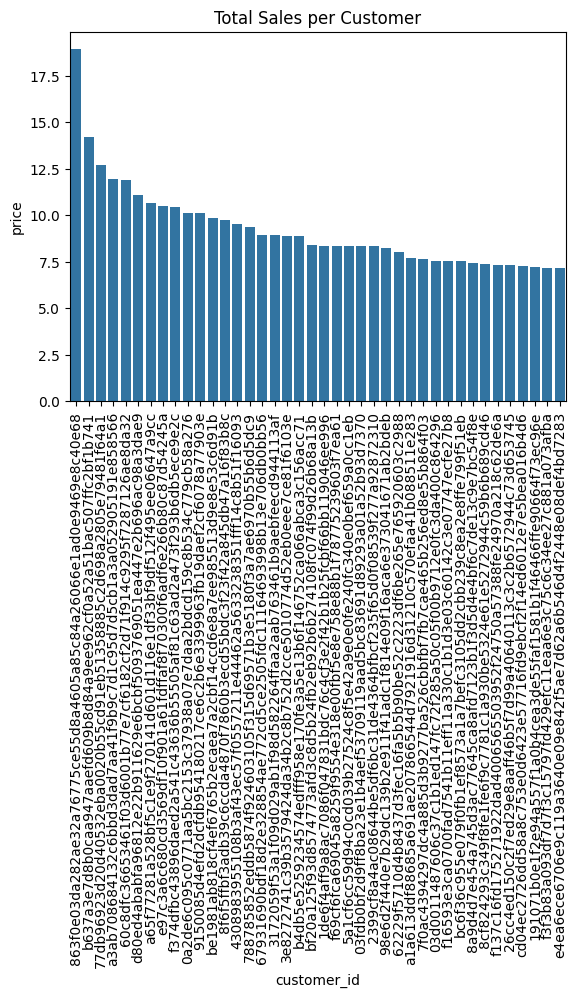

In [81]:
g=sns.barplot(data=TransactionsAndArticlesAndCustomersGroupbyCustomer.head(40),x='customer_id',y='price')
g.set_title('Total Sales per Customer');
g.set_xticklabels(g.get_xticklabels(), rotation=90);

### 5. What do they purchase from us
#### Let's explore what our top customers are buying from us

In [96]:
### due to performance reasons we consider only the top 10 customers for the following visualization
Top5Customers=TransactionsAndArticlesAndCustomersGroupbyCustomer.head(5).index

Top5CustomersFilter=TransactionsAndArticles['customer_id'].isin(Top5Customers)

In [104]:
pd.set_option('display.max_rows', 500)
TransactionsAndArticles[Top5CustomersFilter].groupby(['customer_id','prod_name']).agg({'price':'sum'}).head(500)

price
customer_id                                        prod_name                               
60c8dfc36653461f03d6001b77e7cf6182cf2d71f914c92... + Miami shape highwaist         0.025407
                                                   AK Cheddar blazer               0.058271
                                                   AUDREY DRESS LOW PRICE          0.025407
                                                   Abigail PQ sandal               0.022017
                                                   Ace Dress(1)                    0.050814
                                                   Ada                             0.101644
                                                   Alice waist                     0.024136
                                                   Ally Blazer                     0.118627
                                                   Angel                           0.030492
                                                   Antonia heavy t-shirt           0.016932
                                                   Astrid shirt                    0.024966
                                                   Atlanta metal hip               0.048271
                                                   Atomic Wrap Sweater             0.041627
                                                   Aurelia blazer dress            0.101678
                                                   B Wagg Speed Kaftan             0.067780
                                                   BOB set 2pcs                    0.025407
                                                   BROADWAY SHIRT                  0.025407
                                                   Bambini                         0.010153
                                                   Barracuda wide trouser          0.050831
                                                   Bergamo Quilted Jacket          0.101678
                                                   Boujis strap                    0.050814
                                                   Boyfriend L.W consc.            0.067780
                                                   Brody                           0.008458
                                                   Brody trs                       0.067780
                                                   Bumling oversized joggers       0.033881
                                                   Buster blazer                   0.135559
                                                   C-Flavia dress                  0.033881
                                                   CNY Megan knit                  0.040237
                                                   CS Santa Barbara                0.050831
                                                   Calais                          0.135559
                                                   Calypso brazilian V-shape       0.027085
                                                   Carmen                          0.033881
                                                   Carmen felt Hat.                0.042356
                                                   Carp mini                       0.033881
                                                   Charlotte Unpadded Wire         0.025407
                                                   Cheeky Clara Cheeky Swimsuit    0.033881
                                                   Clean Bandit Highwaist          0.025407
                                                   Clementina dress                0.067780
                                                   Clementine blouse               0.030492
                                                   Columbo Dress                   0.049949
                                                   Cora Woven tee                  0.027441
                                                   DIV+ Charlotte                  0.033881
                                      